In [1]:
# set up

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts import options as opts
from pyecharts.charts import Page, Pie, Geo, Bar

In [3]:
# load data

In [4]:
data = pd.read_excel('travel.xlsx')

In [5]:
# examine data

In [6]:
data.head()

,地点,短评,出发时间,天数,人均费用,人物,玩法,浏览量
0,西安,一场只属于我们两父子的旅行——35天9省区畅游祖国壮丽山河之陕西-宁夏篇,/2020/08/12,6,2400,亲子,第一次?穷游?美食?暑假,300.0
1,开封,开封第1天——1.1开封府,/2021/02/27,1,400,家庭,深度游?徒步?美食?冬季,16000.0
2,三亚,三亚小众玩法春天刚来，我便开始想念海边的漫时光,/2021/01/31,4,2600,三五好友,自驾?美食?摄影,2729.0
3,延吉,延吉十八时辰，孤独“美食家”的不孤独脚步,/2020/12/25,2,500,独自一人,短途周末?美食?摄影?冬季,9521.0
4,漳州,六天五夜，探秘闽北闽南人间秘境,/2021/02/19,6,1200,三五好友,自驾?春节?踏春,4901.0


In [7]:
data.shape

(1601, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   地点      1601 non-null   object 
 1   短评      1601 non-null   object 
 2   出发时间    1597 non-null   object 
 3   天数      1601 non-null   int64  
 4   人均费用    1601 non-null   int64  
 5   人物      1601 non-null   object 
 6   玩法      1601 non-null   object 
 7   浏览量     1601 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 100.2+ KB


In [9]:
# summary statistics

In [10]:
data.describe()

,天数,人均费用,浏览量
count,1601.000000,1601.000000,1.601000e+03
mean,4.059963,1507.138663,2.867840e+05
std,4.862243,727.216306,5.337490e+06
min,1.000000,1.000000,3.300000e+00
25%,3.000000,1000.000000,5.416000e+03
50%,3.000000,1500.000000,1.200000e+04
75%,5.000000,2000.000000,3.200000e+04
max,99.000000,2999.000000,1.800000e+08


In [11]:
# data visualization

Text(0.5, 1.0, 'Top 15 Traveling Periods of the data')

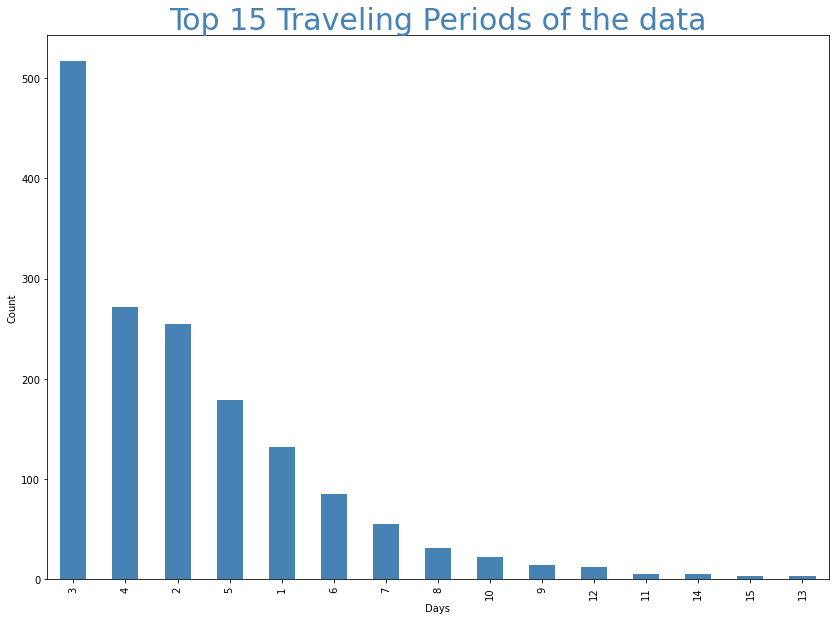

In [12]:
topdays_15 = data['天数'].value_counts()[:15]
topdays_15.plot(kind='bar',figsize=(14,10),color='steelblue')
plt.style.use('ggplot')
plt.xlabel('Days')
plt.ylabel('Count')
plt.title(label="Top 15 Traveling Periods of the data",
          fontsize=30,
          color="steelblue")
# 大部分旅行天数在一个星期以下，最多频率的是5天以下，10天以上属于罕见

In [13]:
data['地点'].value_counts()[:15].index.tolist()

['成都',
 '重庆',
 '厦门',
 '三亚',
 '西安',
 '攻略',
 '平遥',
 '杭州',
 '北京',
 '南京',
 '桂林',
 '阳朔',
 '日照',
 '长沙',
 '上海']

In [14]:
data['地点'].value_counts()[:15].tolist()

[113, 60, 52, 49, 38, 37, 34, 34, 34, 30, 24, 21, 20, 19, 19]

In [15]:

bar = Bar()
bar.add_xaxis(['成都',
 '重庆',
 '厦门',
 '三亚',
 '西安',
 '攻略',
 '平遥',
 '杭州',
 '北京',
 '南京',
 '桂林',
 '阳朔',
 '日照',
 '长沙',
 '上海'])
bar.add_yaxis("",[113, 60, 52, 49, 38, 37, 34, 34, 34, 30, 24, 21, 20, 19, 19],color='steelblue')
bar.set_global_opts(title_opts=opts.TitleOpts(title="前15名热度城市旅游次数"))
bar.render_notebook()

Text(0.5, 1.0, 'Histogram of Traveling Fees')

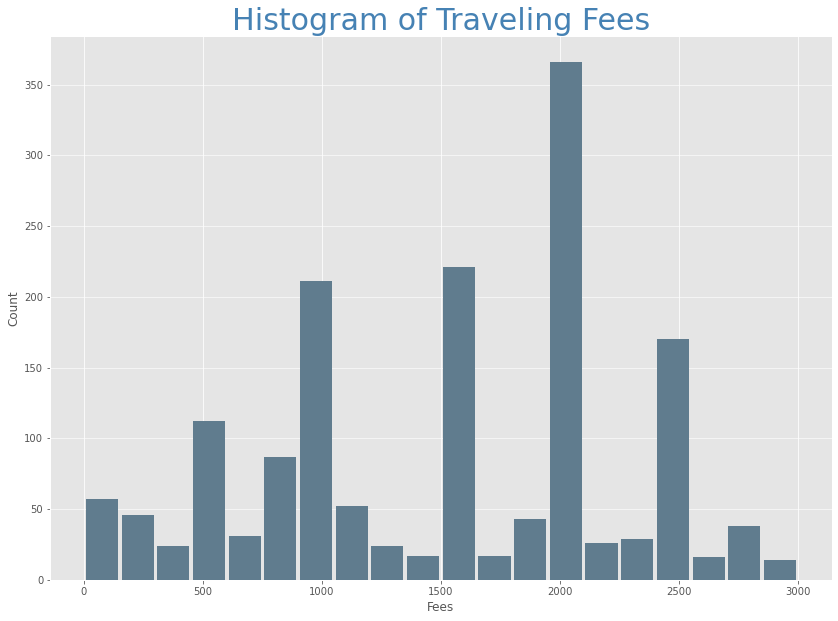

In [16]:
topfees = data['人均费用']
topfees.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e',figsize=(14,10))
plt.style.use('ggplot')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Fees')
plt.ylabel('Count')
plt.title(label="Histogram of Traveling Fees",
          fontsize=30,
          color="steelblue")

In [17]:
value = ['成都',
 '重庆',
 '厦门',
 '三亚',
 '西安',
 '攻略',
 '平遥',
 '杭州',
 '北京',
 '南京',
 '桂林',
 '阳朔',
 '日照',
 '长沙',
 '上海']

data_new = data[data['地点'].isin(value)]
data_new.head()

,地点,短评,出发时间,天数,人均费用,人物,玩法,浏览量
0,西安,一场只属于我们两父子的旅行——35天9省区畅游祖国壮丽山河之陕西-宁夏篇,/2020/08/12,6,2400,亲子,第一次?穷游?美食?暑假,300.0
2,三亚,三亚小众玩法春天刚来，我便开始想念海边的漫时光,/2021/01/31,4,2600,三五好友,自驾?美食?摄影,2729.0
5,三亚,【三亚旅游】姐妹一起超High！四天三夜海边狂欢，住宿美食、景点交通全攻略,/2020/12/22,4,2000,闺蜜,美食?夏季?寒假,10000.0
6,三亚,在北纬18°的“东方夏威夷”三亚，赴一场椰风、海韵与美食的约会,/2021/02/05,4,1000,三五好友,短途周末?自驾?美食?冬季,9148.0
7,成都,一场只属于我们两父子的旅行——35天9省区畅游祖国壮丽山河之四川篇2,/2020/07/28,6,2100,亲子,第一次?穷游?美食?暑假,379.0


In [18]:
type(data_new)

pandas.core.frame.DataFrame

Text(0.5, 1.0, 'Histogram of Browsing Times')

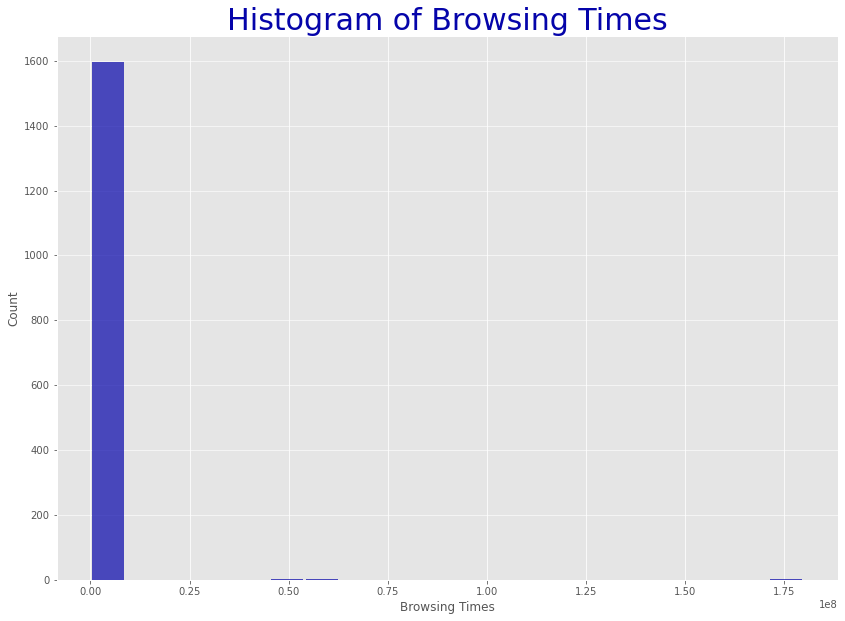

In [19]:
topbrowsing = data['浏览量']
topbrowsing.plot.hist(grid=True, bins = 20, rwidth=0.9, color='#0504aa', alpha=0.7, figsize=(14,10))
plt.grid(axis='y', alpha=0.75)
plt.style.use('ggplot')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Browsing Times')
plt.ylabel('Count')
plt.title(label="Histogram of Browsing Times",
          fontsize=30,
          color="#0504aa")


In [20]:
data_new['人均费用'].groupby(data_new['地点']).mean().sort_values(ascending = False)

地点
三亚    2041.081633
西安    1977.236842
厦门    1892.076923
阳朔    1790.476190
桂林    1708.958333
上海    1557.894737
重庆    1544.416667
成都    1542.796460
攻略    1532.432432
长沙    1498.631579
杭州    1445.000000
北京    1417.852941
南京    1294.700000
平遥    1155.882353
日照    1035.000000
Name: 人均费用, dtype: float64

In [21]:
data_new['人均费用'].groupby(data_new['地点']).mean().sort_values(ascending = False).index.tolist()

['三亚',
 '西安',
 '厦门',
 '阳朔',
 '桂林',
 '上海',
 '重庆',
 '成都',
 '攻略',
 '长沙',
 '杭州',
 '北京',
 '南京',
 '平遥',
 '日照']

In [22]:
data_new['人均费用'].groupby(data_new['地点']).mean().sort_values(ascending = False).tolist()

[2041.0816326530612,
 1977.2368421052631,
 1892.076923076923,
 1790.4761904761904,
 1708.9583333333333,
 1557.8947368421052,
 1544.4166666666667,
 1542.796460176991,
 1532.4324324324325,
 1498.6315789473683,
 1445.0,
 1417.8529411764705,
 1294.7,
 1155.8823529411766,
 1035.0]

In [23]:
bar = Bar()
bar.add_xaxis(data_new['人均费用'].groupby(data_new['地点']).mean().sort_values(ascending = False).index.tolist())
bar.add_yaxis("",data_new['人均费用'].groupby(data_new['地点']).mean().sort_values(ascending = False).tolist(),color='darkgreen')
bar.set_global_opts(title_opts=opts.TitleOpts(title="前15名热度城市平均消费"))
bar.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
bar.render_notebook()

<AxesSubplot:ylabel='浏览量'>

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27983 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 35272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 27983 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 35272 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 37327 missing from curre

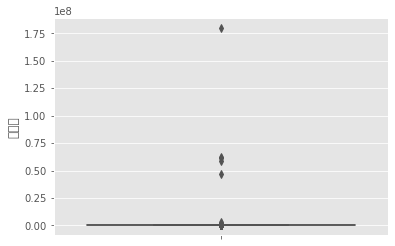

In [24]:
topbrowsing = data['浏览量']
sns.boxplot(y=topbrowsing)

Text(0, 0.5, 'Count')

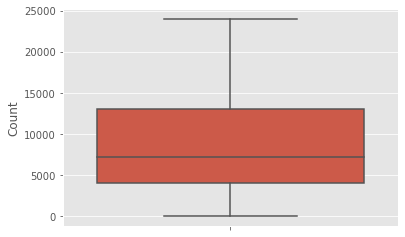

In [25]:
data_selected = data.loc[data['浏览量'] < 25000]
topbrowsing_selected = data_selected['浏览量']
sns.boxplot(y=topbrowsing_selected)
plt.ylabel('Count')

Text(0.5, 1.0, 'Histogram of Selected Browsing Times')

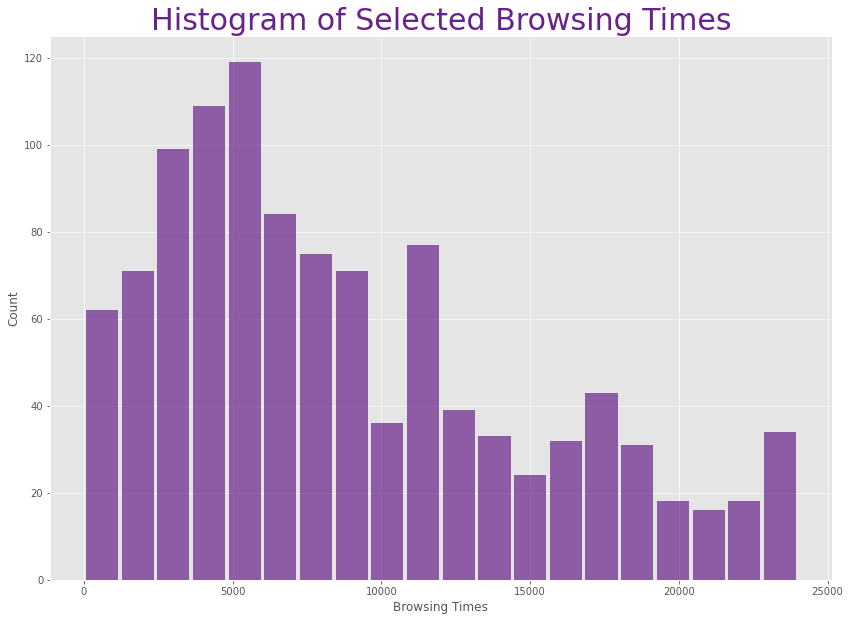

In [26]:
topbrowsing_selected.plot.hist(grid=True, bins = 20, rwidth=0.9, color="#68228B", alpha=0.7, figsize=(14,10))
plt.grid(axis='y', alpha=0.75)
plt.style.use('ggplot')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Browsing Times')
plt.ylabel('Count')
plt.title(label="Histogram of Selected Browsing Times",
          fontsize=30,
          color="#68228B")


In [27]:
data_new['浏览量'].groupby(data_new['地点']).mean().sort_values(ascending = False)

地点
西安    1.248666e+06
成都    1.107754e+06
长沙    1.805917e+05
厦门    4.620623e+04
三亚    3.810435e+04
重庆    3.530627e+04
平遥    3.062461e+04
杭州    2.889109e+04
日照    2.815070e+04
桂林    2.814083e+04
攻略    2.762359e+04
北京    2.344635e+04
南京    2.143987e+04
阳朔    1.950435e+04
上海    1.515084e+04
Name: 浏览量, dtype: float64

In [28]:
data_new['浏览量'].groupby(data_new['地点']).mean().sort_values(ascending = False).index.tolist()

['西安',
 '成都',
 '长沙',
 '厦门',
 '三亚',
 '重庆',
 '平遥',
 '杭州',
 '日照',
 '桂林',
 '攻略',
 '北京',
 '南京',
 '阳朔',
 '上海']

In [29]:
bar = Bar()
bar.add_xaxis(data_new['浏览量'].groupby(data_new['地点']).mean().sort_values(ascending = False).index.tolist())
bar.add_yaxis("",data_new['浏览量'].groupby(data_new['地点']).mean().sort_values(ascending = False).tolist(),color='darkred')
bar.set_global_opts(title_opts=opts.TitleOpts(title="前15名热度城市浏览量"))
bar.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
bar.render_notebook()

In [30]:
# pie chart

In [31]:
pd.set_option("display.max_rows", None)
data['地点'].value_counts()

成都           113
重庆            60
厦门            52
三亚            49
西安            38
攻略            37
平遥            34
杭州            34
北京            34
南京            30
桂林            24
阳朔            21
日照            20
长沙            19
上海            19
苏州            19
广州            19
丽江            16
青岛            15
济南            15
张家界           15
贵阳            14
无锡            14
黄山            13
大连            13
哈尔滨           12
香港            11
泉州            10
天津            10
宁波            10
武汉             9
珠海             9
承德             8
银川             8
开封             8
澳门             8
深圳             8
北海             8
香格里拉           8
太原             8
洛阳             7
兰州             7
汕头             7
昆明             7
大理             7
南浔             7
婺源             7
张家港            6
温州             6
建德             6
敦煌             6
莫干山            6
清迈             6
文成             5
呼伦贝尔           5
西双版纳           5
镇江             5
潮州             5
涠洲岛           

In [32]:

attr = data['地点'].value_counts().index.to_list()
v1 = data['地点'].value_counts().to_list()

pie = (
    Pie()
    .add('Pie Chart for destination in data',[(i,j)for i,j in zip(attr,v1)])
    .set_global_opts(title_opts=opts.TitleOpts(title="Pie Chart"),
                    legend_opts=opts.LegendOpts(pos_left = "93%", orient = "vertical"))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
)
pie.render_notebook()

In [33]:
data['人物'].value_counts()

三五好友    659
家庭      257
独自一人    236
情侣      198
亲子      123
闺蜜      107
学生       21
Name: 人物, dtype: int64

In [34]:
attr_1 = ["三五好友","家庭","独自一人","情侣","亲子","闺蜜","学生"]
v1_1 = [ 659,257,236,198,123,107,21]

pie = (
    Pie()
    .add('Pie Chart for destination in data',[(i,j)for i,j in zip(attr_1,v1_1)])
    .set_global_opts(title_opts=opts.TitleOpts(title="Pie Chart"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
)
pie.render_notebook()

In [35]:
s =  data['地点'].value_counts()
print(s)

成都           113
重庆            60
厦门            52
三亚            49
西安            38
攻略            37
平遥            34
杭州            34
北京            34
南京            30
桂林            24
阳朔            21
日照            20
长沙            19
上海            19
苏州            19
广州            19
丽江            16
青岛            15
济南            15
张家界           15
贵阳            14
无锡            14
黄山            13
大连            13
哈尔滨           12
香港            11
泉州            10
天津            10
宁波            10
武汉             9
珠海             9
承德             8
银川             8
开封             8
澳门             8
深圳             8
北海             8
香格里拉           8
太原             8
洛阳             7
兰州             7
汕头             7
昆明             7
大理             7
南浔             7
婺源             7
张家港            6
温州             6
建德             6
敦煌             6
莫干山            6
清迈             6
文成             5
呼伦贝尔           5
西双版纳           5
镇江             5
潮州             5
涠洲岛           

In [36]:
type(s)

pandas.core.series.Series

In [37]:
s_1 = s.drop(labels=['攻略','莫干山','清迈','涠洲岛','泸沽湖','乌镇','周庄','丰宁','海西','陵水','宏村',
                    '黄果树','暹粒','瑶里','喜洲','塞罕坝','上海迪士尼度假区','埃里温','怡保','黔南',
                    '乌兰布统草原','马尼拉','喀纳斯','横店','马六甲','防城港','黑水县','留坝','吕梁',
                    '杭锦旗','布尔津','新安江','博卡拉','伊金霍洛旗','塞哥维亚','布拉迪斯拉发','芽庄',
                     '伊犁','天目湖','湘西','大叻','箱根町','千岛湖','巴蜀','大阪','埃武拉','楠溪江',
                    '墨尔本','洛桑','伊斯兰堡','第比利斯','函馆','罗托鲁瓦','苏梅岛','克尔曼','焦特布尔',
                    '四季兰达吉拉瓦鲁岛','抚仙湖','五指山','琅勃拉邦','蔚县','正蓝旗','塞维利亚','马斯特里赫特',
                    '共和','东极岛','格雷梅','斯里巴加湾','若尔盖','石河子','宁','秭归','设拉子','仙本那',
                    '辛特拉','建水','扎达尔','龙脊梯田','剑阁','宁国','古北水镇','野三坡','白洋淀','马德里',
                    '新加坡','下川岛','四姑娘山','州','伦敦','曼德勒','曼谷','普吉岛','老挝','东戴河',
                    '镰仓','连南','同里','华沙','切尔','华山','莽山','三清山','亚庇','洛带','琼中',
                    '石林','拉穆','三都','西递','九华山','普洱','浪卡子','伦敦','龙游','犍为','碌曲'])
print(s_1)

成都       113
重庆        60
厦门        52
三亚        49
西安        38
平遥        34
杭州        34
北京        34
南京        30
桂林        24
阳朔        21
日照        20
长沙        19
上海        19
苏州        19
广州        19
丽江        16
青岛        15
济南        15
张家界       15
贵阳        14
无锡        14
黄山        13
大连        13
哈尔滨       12
香港        11
泉州        10
天津        10
宁波        10
武汉         9
珠海         9
承德         8
银川         8
开封         8
澳门         8
深圳         8
北海         8
香格里拉       8
太原         8
洛阳         7
兰州         7
汕头         7
昆明         7
大理         7
南浔         7
婺源         7
张家港        6
温州         6
建德         6
敦煌         6
文成         5
呼伦贝尔       5
西双版纳       5
镇江         5
潮州         5
呼和浩特       5
海口         5
扬州         5
阿坝         5
康定         5
阿尔山        5
武陵源        5
遂昌         5
曲阜         5
拉萨         4
常州         4
沈阳         4
稻城         4
恩施         4
漳州         4
长白山        4
乡宁         4
泰山         4
东营         4
兴化         4
山海关        4
淮安         4

In [38]:
s_new = dict(s_1)  # = s.to_dict()
s_new

{'成都': 113,
 '重庆': 60,
 '厦门': 52,
 '三亚': 49,
 '西安': 38,
 '平遥': 34,
 '杭州': 34,
 '北京': 34,
 '南京': 30,
 '桂林': 24,
 '阳朔': 21,
 '日照': 20,
 '长沙': 19,
 '上海': 19,
 '苏州': 19,
 '广州': 19,
 '丽江': 16,
 '青岛': 15,
 '济南': 15,
 '张家界': 15,
 '贵阳': 14,
 '无锡': 14,
 '黄山': 13,
 '大连': 13,
 '哈尔滨': 12,
 '香港': 11,
 '泉州': 10,
 '天津': 10,
 '宁波': 10,
 '武汉': 9,
 '珠海': 9,
 '承德': 8,
 '银川': 8,
 '开封': 8,
 '澳门': 8,
 '深圳': 8,
 '北海': 8,
 '香格里拉': 8,
 '太原': 8,
 '洛阳': 7,
 '兰州': 7,
 '汕头': 7,
 '昆明': 7,
 '大理': 7,
 '南浔': 7,
 '婺源': 7,
 '张家港': 6,
 '温州': 6,
 '建德': 6,
 '敦煌': 6,
 '文成': 5,
 '呼伦贝尔': 5,
 '西双版纳': 5,
 '镇江': 5,
 '潮州': 5,
 '呼和浩特': 5,
 '海口': 5,
 '扬州': 5,
 '阿坝': 5,
 '康定': 5,
 '阿尔山': 5,
 '武陵源': 5,
 '遂昌': 5,
 '曲阜': 5,
 '拉萨': 4,
 '常州': 4,
 '沈阳': 4,
 '稻城': 4,
 '恩施': 4,
 '漳州': 4,
 '长白山': 4,
 '乡宁': 4,
 '泰山': 4,
 '东营': 4,
 '兴化': 4,
 '山海关': 4,
 '淮安': 4,
 '溧阳': 4,
 '铜仁': 4,
 '武当山': 4,
 '郴州': 4,
 '江门': 4,
 '怀化': 3,
 '绍兴': 3,
 '合肥': 3,
 '宁海': 3,
 '郑州': 3,
 '青海湖': 3,
 '宜春': 3,
 '昌黎': 3,
 '石台': 3,
 '安吉': 3,
 '温岭': 3,
 '黄山区': 3,
 '韶关': 3,
 '

In [39]:
type(s_new)

dict

In [40]:
result = s_new.items()
result

dict_items([('成都', 113), ('重庆', 60), ('厦门', 52), ('三亚', 49), ('西安', 38), ('平遥', 34), ('杭州', 34), ('北京', 34), ('南京', 30), ('桂林', 24), ('阳朔', 21), ('日照', 20), ('长沙', 19), ('上海', 19), ('苏州', 19), ('广州', 19), ('丽江', 16), ('青岛', 15), ('济南', 15), ('张家界', 15), ('贵阳', 14), ('无锡', 14), ('黄山', 13), ('大连', 13), ('哈尔滨', 12), ('香港', 11), ('泉州', 10), ('天津', 10), ('宁波', 10), ('武汉', 9), ('珠海', 9), ('承德', 8), ('银川', 8), ('开封', 8), ('澳门', 8), ('深圳', 8), ('北海', 8), ('香格里拉', 8), ('太原', 8), ('洛阳', 7), ('兰州', 7), ('汕头', 7), ('昆明', 7), ('大理', 7), ('南浔', 7), ('婺源', 7), ('张家港', 6), ('温州', 6), ('建德', 6), ('敦煌', 6), ('文成', 5), ('呼伦贝尔', 5), ('西双版纳', 5), ('镇江', 5), ('潮州', 5), ('呼和浩特', 5), ('海口', 5), ('扬州', 5), ('阿坝', 5), ('康定', 5), ('阿尔山', 5), ('武陵源', 5), ('遂昌', 5), ('曲阜', 5), ('拉萨', 4), ('常州', 4), ('沈阳', 4), ('稻城', 4), ('恩施', 4), ('漳州', 4), ('长白山', 4), ('乡宁', 4), ('泰山', 4), ('东营', 4), ('兴化', 4), ('山海关', 4), ('淮安', 4), ('溧阳', 4), ('铜仁', 4), ('武当山', 4), ('郴州', 4), ('江门', 4), ('怀化', 3), ('绍兴', 3), ('合肥', 3), ('宁海', 

In [41]:
df_geo = list(result)
df_geo

[('成都', 113),
 ('重庆', 60),
 ('厦门', 52),
 ('三亚', 49),
 ('西安', 38),
 ('平遥', 34),
 ('杭州', 34),
 ('北京', 34),
 ('南京', 30),
 ('桂林', 24),
 ('阳朔', 21),
 ('日照', 20),
 ('长沙', 19),
 ('上海', 19),
 ('苏州', 19),
 ('广州', 19),
 ('丽江', 16),
 ('青岛', 15),
 ('济南', 15),
 ('张家界', 15),
 ('贵阳', 14),
 ('无锡', 14),
 ('黄山', 13),
 ('大连', 13),
 ('哈尔滨', 12),
 ('香港', 11),
 ('泉州', 10),
 ('天津', 10),
 ('宁波', 10),
 ('武汉', 9),
 ('珠海', 9),
 ('承德', 8),
 ('银川', 8),
 ('开封', 8),
 ('澳门', 8),
 ('深圳', 8),
 ('北海', 8),
 ('香格里拉', 8),
 ('太原', 8),
 ('洛阳', 7),
 ('兰州', 7),
 ('汕头', 7),
 ('昆明', 7),
 ('大理', 7),
 ('南浔', 7),
 ('婺源', 7),
 ('张家港', 6),
 ('温州', 6),
 ('建德', 6),
 ('敦煌', 6),
 ('文成', 5),
 ('呼伦贝尔', 5),
 ('西双版纳', 5),
 ('镇江', 5),
 ('潮州', 5),
 ('呼和浩特', 5),
 ('海口', 5),
 ('扬州', 5),
 ('阿坝', 5),
 ('康定', 5),
 ('阿尔山', 5),
 ('武陵源', 5),
 ('遂昌', 5),
 ('曲阜', 5),
 ('拉萨', 4),
 ('常州', 4),
 ('沈阳', 4),
 ('稻城', 4),
 ('恩施', 4),
 ('漳州', 4),
 ('长白山', 4),
 ('乡宁', 4),
 ('泰山', 4),
 ('东营', 4),
 ('兴化', 4),
 ('山海关', 4),
 ('淮安', 4),
 ('溧阳', 4),
 ('铜仁', 4),
 ('武当山'

In [42]:
geo = (
Geo()
    .add_schema(maptype="china")
    .add("",df_geo)
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
    visualmap_opts=opts.VisualMapOpts(),
    title_opts=opts.TitleOpts(title="旅游景点图"),
    )
)
geo.render("GEO_Heatmap.html")
geo.render_notebook()